# Support Vector Machine (SVM)
Integrantes:
- Adrian Fulladolsa - 21592
- Jimena Hernández - 21199
- Emilio Solano - 21212
- Diego Hernández - 21270
- Linda Jimenez - 21169
- Javier Alvarado - 21188

## Importar las librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el conjunto de datos

In [4]:
datos = pd.read_csv('Social_Network_Ads.csv')
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

X.shape, y.shape

((400, 2), (400,))

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import pandas as pd 

# Cargar dataset "Covertype" de OpenML
covertype = fetch_openml(name="covertype", version=3, as_frame=False)
X, y = covertype.data, covertype.target

# Obtener los nombres de todas las características del dataset
feature_names = covertype.feature_names

# Crear un DataFrame de pandas con las características y el objetivo
df = pd.DataFrame(X, columns=feature_names)
# Imprimir el encabezado del DataFrame para ver las primeras filas
#print(df.head())


resumen = df.info()

# Imprimir el resumen
print(resumen)

# Limitar el número de muestras para hacerlo más manejable
max_samples = 10000
X, y = X[:max_samples], y[:max_samples]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  object
 1   Aspect                              581012 non-null  object
 2   Slope                               581012 non-null  object
 3   Horizontal_Distance_To_Hydrology    581012 non-null  object
 4   Vertical_Distance_To_Hydrology      581012 non-null  object
 5   Horizontal_Distance_To_Roadways     581012 non-null  object
 6   Hillshade_9am                       581012 non-null  object
 7   Hillshade_Noon                      581012 non-null  object
 8   Hillshade_3pm                       581012 non-null  object
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  object
 10  Wilderness_Area1                    581012 non-null  object
 11  Wilderness_Area2                    581

## Dividir el conjunto de datos en un conjunto para entrenar y otro para pruebas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

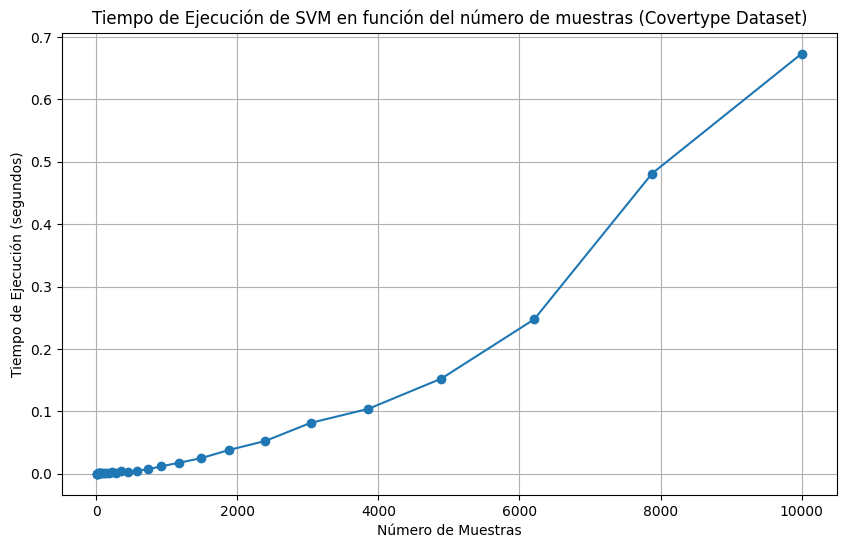

In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd 

# Cargar datos del archivo covtype.data
df = pd.read_csv("covtype.data", header=None)

# Limitar el número de muestras para hacerlo más manejable
max_samples = 10000
print(df.info())

df = df.head(max_samples)

# Obtener características y objetivo del DataFrame
X = df.iloc[:, :-1].values  # Todas las filas, todas las columnas excepto la última
y = df.iloc[:, -1].values  # Todas las filas, última columna

# Función para evaluar SVM con diferentes tamaños de muestras del dataset real
def evaluar_svm(num_muestras):
    X_subset, y_subset = X[:num_muestras], y[:num_muestras]

    X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_subset, y_subset, test_size=0.25, random_state=42)
    
    normalizador = StandardScaler()
    X_entreno = normalizador.fit_transform(X_entreno)
    X_prueba = normalizador.transform(X_prueba)

    clasificador = SVC(kernel='linear', random_state=42)
    inicio = time.time()
    clasificador.fit(X_entreno, y_entreno)
    fin = time.time()
    tiempo_ejecucion = fin - inicio
    
    return tiempo_ejecucion

# Generar 30 tamaños de muestra de manera progresiva hasta el límite de max_samples
tamanos_muestras = np.unique(np.round(np.logspace(1, np.log10(max_samples), 30)).astype(int))
tiempos_ejecucion = [evaluar_svm(n) for n in tamanos_muestras]

# Crear y mostrar la gráfica
plt.figure(figsize=(10, 6))
plt.plot(tamanos_muestras, tiempos_ejecucion, marker='o', linestyle='-')
plt.title('Tiempo de Ejecución de SVM en función del número de muestras (Covertype Dataset)')
plt.xlabel('Número de Muestras')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.grid(True)
plt.show()


In [851]:
print(X_entreno)

NameError: name 'X_entreno' is not defined

In [ ]:
print(y_entreno)

[1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 0 1]


In [ ]:
print(X_prueba)

[[    35  23000]
 [    21  16000]
 [    48  29000]
 [    35  77000]
 [    35  97000]
 [    31  18000]
 [    60 102000]
 [    49  28000]
 [    37 144000]
 [    27  54000]
 [    54 108000]
 [    46  88000]
 [    45  45000]
 [    35  72000]
 [    38  50000]
 [    26  72000]
 [    32 117000]
 [    20  49000]
 [    29 148000]
 [    35  57000]
 [    36  33000]
 [    42  54000]
 [    35 108000]
 [    24  55000]
 [    56 104000]
 [    59  83000]
 [    47  20000]
 [    41  87000]
 [    41  72000]
 [    41  72000]
 [    46  96000]
 [    24  89000]
 [    42  75000]
 [    26  86000]
 [    30  17000]
 [    33  43000]
 [    30  49000]
 [    52 114000]
 [    33  28000]
 [    49  89000]
 [    35  73000]
 [    53  82000]
 [    20  86000]
 [    31  74000]
 [    42  53000]
 [    24  23000]
 [    35  50000]
 [    33  51000]
 [    48  35000]
 [    52  90000]
 [    24  84000]
 [    29  75000]
 [    47 113000]
 [    47  23000]
 [    41  52000]
 [    40  60000]
 [    48  33000]
 [    36  52000]
 [    27  2000

In [ ]:
print(y_prueba)

[0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0]


## Escalamiento o normalización de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

In [ ]:
print(X_entreno)

[[ 0.9446258   1.40295623]
 [ 0.84956114 -1.15536445]
 [ 0.84956114  1.00052376]
 [-1.62211991 -0.06304775]
 [ 2.08540166 -0.81042233]
 [-0.95666732 -0.32175434]
 [ 0.18410855 -0.26426399]
 [-1.4319906  -1.44281621]
 [ 0.27917321  0.05193295]
 [-0.95666732 -0.75293198]
 [-0.86160266 -0.66669645]
 [-1.52705525  0.31063954]
 [-1.05173197 -1.52905174]
 [-1.05173197  0.51185577]
 [-1.05173197  1.9203694 ]
 [-1.14679663  0.39687507]
 [-0.00602076 -0.43673504]
 [-0.29121473  0.05193295]
 [ 0.9446258  -0.83916751]
 [ 1.13475511  0.51185577]
 [ 1.41994907  0.97177859]
 [ 1.70514304  1.8053887 ]
 [-0.29121473  0.13816848]
 [ 0.37423786  0.97177859]
 [ 0.9446258   0.74181718]
 [ 0.27917321 -0.55171575]
 [-0.00602076  0.02318778]
 [-0.19615007  0.13816848]
 [ 0.37423786 -0.14928328]
 [-0.29121473 -0.32175434]
 [-0.00602076 -0.14928328]
 [-1.14679663 -1.52905174]
 [ 0.08904389  1.83413387]
 [-0.19615007 -0.29300916]
 [-1.14679663 -1.55779691]
 [-1.05173197 -1.12661927]
 [-0.95666732 -0.43673504]
 

In [ ]:
print(X_prueba)

[[-0.29121473 -1.35658068]
 [-1.62211991 -1.55779691]
 [ 0.9446258  -1.18410962]
 [-0.29121473  0.19565883]
 [-0.29121473  0.77056236]
 [-0.67147335 -1.50030656]
 [ 2.08540166  0.91428824]
 [ 1.03969045 -1.2128548 ]
 [-0.10108542  2.12158563]
 [-1.05173197 -0.46548022]
 [ 1.51501373  1.08675929]
 [ 0.75449648  0.51185577]
 [ 0.65943183 -0.7241868 ]
 [-0.29121473  0.05193295]
 [-0.00602076 -0.58046092]
 [-1.14679663  0.05193295]
 [-0.5764087   1.34546588]
 [-1.71718456 -0.6092061 ]
 [-0.86160266  2.23656634]
 [-0.29121473 -0.37924469]
 [-0.19615007 -1.06912892]
 [ 0.37423786 -0.46548022]
 [-0.29121473  1.08675929]
 [-1.33692594 -0.43673504]
 [ 1.70514304  0.97177859]
 [ 1.99033701  0.36812989]
 [ 0.84956114 -1.44281621]
 [ 0.27917321  0.48311059]
 [ 0.27917321  0.05193295]
 [ 0.27917321  0.05193295]
 [ 0.75449648  0.74181718]
 [-1.33692594  0.54060095]
 [ 0.37423786  0.13816848]
 [-1.14679663  0.45436542]
 [-0.76653801 -1.52905174]
 [-0.48134404 -0.78167716]
 [-0.76653801 -0.6092061 ]
 

## Entrenar el modelo SVM con el conjunto de datos para entrenamiento

Si entran a la documentación de SVM, verán que podríamos utilizar cualquiera de las siguientes dos clases:

* SVM_linear
* SVC

Vamos a usar la segunda porque es más genérica y, como podrán ver tiene la opción de seleccionar el *kernel* = "linear".  De esta forma nos vamos adelantando un poco al siguiente modelo que veremos que será el *kernel SVM*


In [ ]:
from sklearn.svm import SVC

clasificador = SVC(kernel = 'linear', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

SVC(kernel='linear', random_state=0)

## Predicción de un nuevo resultado

In [ ]:
print(clasificador.predict(normalizador.transform([[30,87000]])))

[0]


## Predicción de los valores del conjunto de datos de prueba

In [ ]:
y_pred = clasificador.predict(X_prueba)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_prueba.reshape(len(y_prueba),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]]


## Obtener la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat_conf = confusion_matrix(y_prueba, y_pred)
print(mat_conf)
accuracy_score(y_prueba, y_pred)

[[63  6]
 [14 17]]


0.8

## Visualizar los resultados con los datos para entrenamiento

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = normalizador.inverse_transform(X_entreno), y_entreno
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clasificador.predict(normalizador.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['red', 'green'])(i), label = j)
plt.title('SVM (Datos para Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

## Visualizar los resultado con los datos para prueba

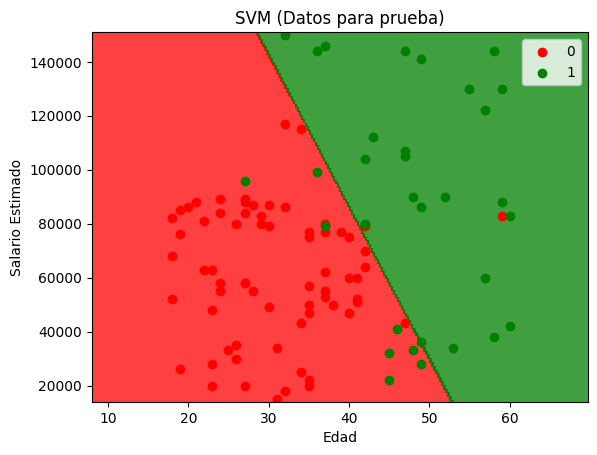

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = normalizador.inverse_transform(X_prueba), y_prueba
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clasificador.predict(normalizador.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['red', 'green'])(i), label = j)
plt.title('SVM (Datos para prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

Se vé que el SVC dió un mejor resultado que el modelo de regresión logística, pero no le ganó al KNN.  Esto es porque se utilizó el kernel lineal.  Es de imaginar que al utilizar otro tipo de kernl, quizás podamos mejorar 